In [62]:
# Import the required python libraries for exploration
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import the data from csv file in pandas dataframe
dataset = pd.read_csv('AB_NYC_2019.csv') #make sure to have datafile in the same repository where you are runnning notebook

In [3]:
# Look at the shape and size of data
dataset.shape

(48895, 16)

In [6]:
# Look at the columns and column types
dataset.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [8]:
# Look at the missing value counts
dataset.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [10]:
# Looks like name and host_name has less than 0.05% of missing values
100*dataset['host_name'].isna().sum()/dataset.shape[0]

0.04294917680744453

In [11]:
# Looks like about 20% of the records doesnt have review- which is normal
100*dataset['last_review'].isna().sum()/dataset.shape[0]

20.55833929849678

In [14]:
## Lets find out top 3 host who frequently visits the particular list
dataset.groupby(['id', 'host_id']).size().sort_values(ascending = False).head(3)

id        host_id 
36487245  68119814    1
13116397  35959584    1
13122932  73029190    1
dtype: int64

In [15]:
# Looks like none of the host visited the specific property more than once

In [16]:
## Lets find out top 3 host who frequently visits
dataset.groupby(['host_id']).size().sort_values(ascending = False).head(3)

host_id
219517861    327
107434423    232
30283594     121
dtype: int64

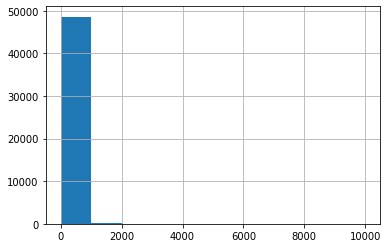

In [32]:
# Lets look at how price is distributed
dataset['price'].hist()

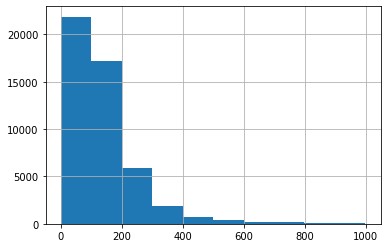

In [36]:
dataset[dataset['price']<1000]['price'].hist()

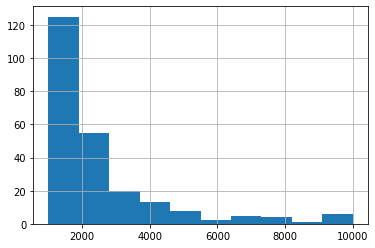

In [37]:
dataset[dataset['price']>1000]['price'].hist()

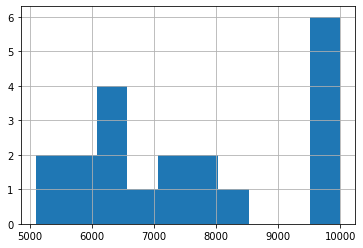

In [38]:
dataset[dataset['price']>5000]['price'].hist()

In [24]:
## Lets look at average room price based on the room_type
dataset.groupby(['room_type']).agg({'price':'mean'})

,price
room_type,
Entire home/apt,211.794246
Private room,89.780973
Shared room,70.127586


In [25]:
## Lets look at average room price based on the neighbourhood_group
dataset.groupby(['neighbourhood_group']).agg({'price':'mean'})

,price
neighbourhood_group,
Bronx,87.496792
Brooklyn,124.383207
Manhattan,196.875814
Queens,99.517649
Staten Island,114.812332


In [26]:
## Lets look at the most expensive and most cheapest property neighbourhood wise
neighbourhood_price_df = dataset.groupby(['neighbourhood']).agg({'price':'mean'})

In [27]:
neighbourhood_price_df.sort_values(by='price', ascending = False).head(3)

,price
neighbourhood,
Fort Wadsworth,800.000000
Woodrow,700.000000
Tribeca,490.638418


In [28]:
neighbourhood_price_df.sort_values(by='price', ascending = True).head(3)

,price
neighbourhood,
Bull's Head,47.333333
Hunts Point,50.500000
Tremont,51.545455


In [39]:
# Lets look at the distribution of the number of reviews


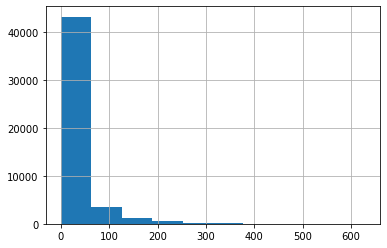

In [40]:
dataset['number_of_reviews'].hist()

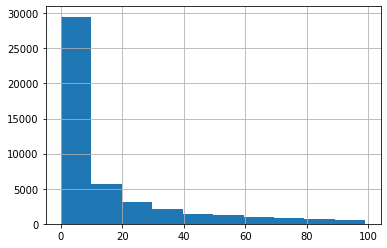

In [41]:
dataset[dataset['number_of_reviews']<100]['number_of_reviews'].hist()

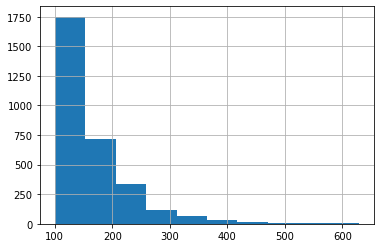

In [42]:
dataset[dataset['number_of_reviews']>=100]['number_of_reviews'].hist()

In [49]:
## Lets plot geographical map (reference:https://towardsdatascience.com/easy-steps-to-plot-geographic-data-on-a-map-python-11217859a2db)
# create a bounding box
BBox = ((dataset.longitude.min(), dataset.longitude.max(),      
         dataset.latitude.min(), dataset.latitude.max()))

In [51]:
BBox

(-74.24441999999999, -73.71299, 40.499790000000004, 40.913059999999994)

In [50]:
# Go to opestreetmap.org website and export the desired map as an image by first entering the bounding box data

In [52]:
my_map = plt.imread('my_map.png')

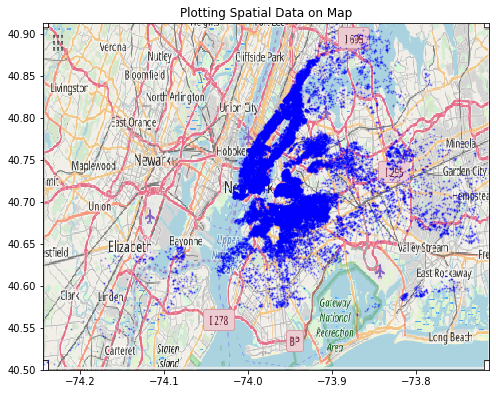

In [56]:
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(dataset.longitude, dataset.latitude, zorder=1, alpha= 0.3, c='b', s=1)
ax.set_title('Plotting Spatial Data on Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(my_map, zorder=0, extent = BBox, aspect= 'equal')

In [ ]:
# From the above map plot we can clearly see that most of the properties are avaibale in New York city
# Slight congestion can also be seen on right side of New York

In [57]:
## Let find the most significant factor which decides the proprty price
dataset[["price", "number_of_reviews"]].corr()
## looks like price has negative correlation with number of reviews but its not that significant

,price,number_of_reviews
price,1.000000,-0.047954
number_of_reviews,-0.047954,1.000000


In [59]:
dataset[["price", "minimum_nights"]].corr()
## looks like price has positive correlation with number of reviews but its not that significant

,price,minimum_nights
price,1.000000,0.042799
minimum_nights,0.042799,1.000000


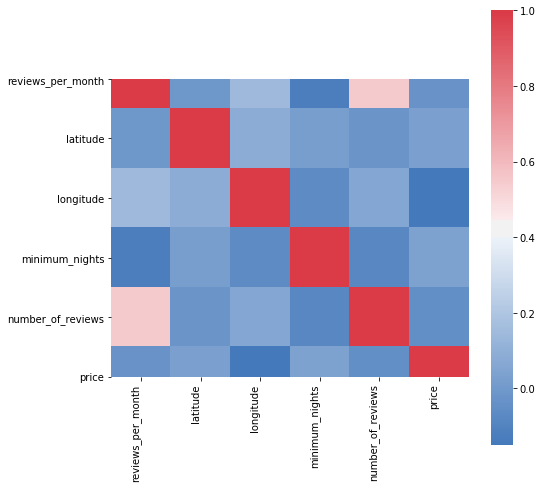

In [65]:
corr = dataset[['reviews_per_month','latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'price']].corr()
#corr

f, ax = plt.subplots(figsize=(8, 8))
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right')
sns.heatmap(corr, cmap=sns.diverging_palette(250, 10, as_cmap=True),square=True, ax=ax)

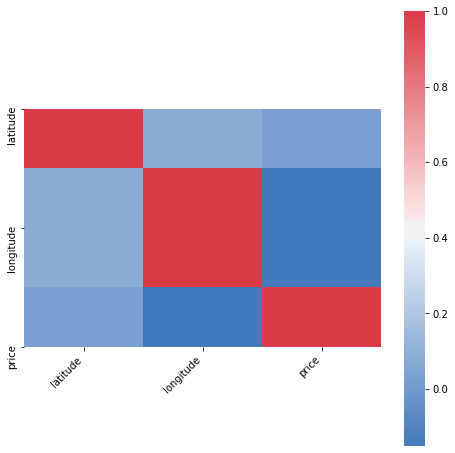

In [66]:
corr = dataset[['latitude', 'longitude','price']].corr()
#corr

f, ax = plt.subplots(figsize=(8, 8))
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right')
sns.heatmap(corr, cmap=sns.diverging_palette(250, 10, as_cmap=True),square=True, ax=ax)

In [67]:
dataset[['latitude', 'longitude','price']].corr()
## looks like price has some what strong correlation with longitude as compared to lattitude

,latitude,longitude,price
latitude,1.000000,0.084788,0.033939
longitude,0.084788,1.000000,-0.150019
price,0.033939,-0.150019,1.000000


In [ ]:
## This is absolutely justifiable as we move away from Newyork towards right (towards Island) the proce tends to be higher
## as its a tourist destination